In [1]:
from src.solver_results.results_dataset import VRPTableDataset
from src.solver_results.vrp_instance import VRPInstance
from src.solver_results.pca_analysis import PCAAnalyzer
from src.solver_results.classification_analysis import ClassificationAnalyzer
from src.solver_results.first_valid_dataset import FirstValidDataset

import pandas as pd
import numpy as np

In [2]:
def load_vrp_instances(path, instance_range):
    """Load VRP instances from CSV files."""
    instances = []

    for i in instance_range:
        filename = f"instance_{i}.csv"
        try:
            df = pd.read_csv(f"{path}/{filename}")

            instance = VRPInstance(i, df)
            instances.append(instance)
        except Exception as e:
            print(f"Error processing {filename}: {e}")

    return instances


def run_pca_analysis(X, Y, feature_cols):
    """Run PCA analysis."""
    print("\n" + "=" * 50)
    print("PCA ANALYSIS")
    print("=" * 50)

    pca_analyzer = PCAAnalyzer()
    pca_analyzer.plot_analysis(X, Y, feature_cols)

    # Find optimal components
    optimal_components, results_df = pca_analyzer.find_optimal_components(X, Y)

    return pca_analyzer


def run_classification_analysis(X, Y, feature_cols):
    """Run classification analysis."""
    print("\n" + "=" * 50)
    print("CLASSIFICATION ANALYSIS")
    print("=" * 50)

    classifier_analyzer = ClassificationAnalyzer()

    # Analyze with original features
    results_original = classifier_analyzer.run_analysis(
        X, Y, feature_cols, "Original Features"
    )

    # Analyze with PCA features
    pca_analyzer = PCAAnalyzer()
    X_pca, pca_reduced = pca_analyzer.get_pca_features(X, n_components=0.95)
    pca_feature_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

    results_pca = classifier_analyzer.run_analysis(
        X_pca, Y, pca_feature_names, f"PCA Features ({X_pca.shape[1]} components)"
    )

    return results_original, results_pca





In [7]:
path = "output/resnet_1_1_2e-07_version_cedar"

VRPInstances = load_vrp_instances(path, range(1001, 1086))

    # Define features
feature_cols = [
    "entropy_score",
    "classifier_score",
    "iter",
    # "entropy_variation",
    "classifier_score_variation",
    "top_arc_value",
    # "top_3_arcs",
    # "top_arc_variation",
    # "top_3_arcs_variation",
]

# Create dataset
dataset = VRPTableDataset(
    vrp_instances=VRPInstances,
    feature_cols=feature_cols,
    # target_col="first_time_valid",
    target_col="valid"
)

first_valid_dataset = FirstValidDataset(VRPInstances)

X, Y = dataset.get_sklearn_inputs()

Error processing instance_1085.csv: [Errno 2] No such file or directory: 'output/resnet_1_1_2e-07_version_cedar/instance_1085.csv'
Cost difference computed and added to dataset.



PCA ANALYSIS


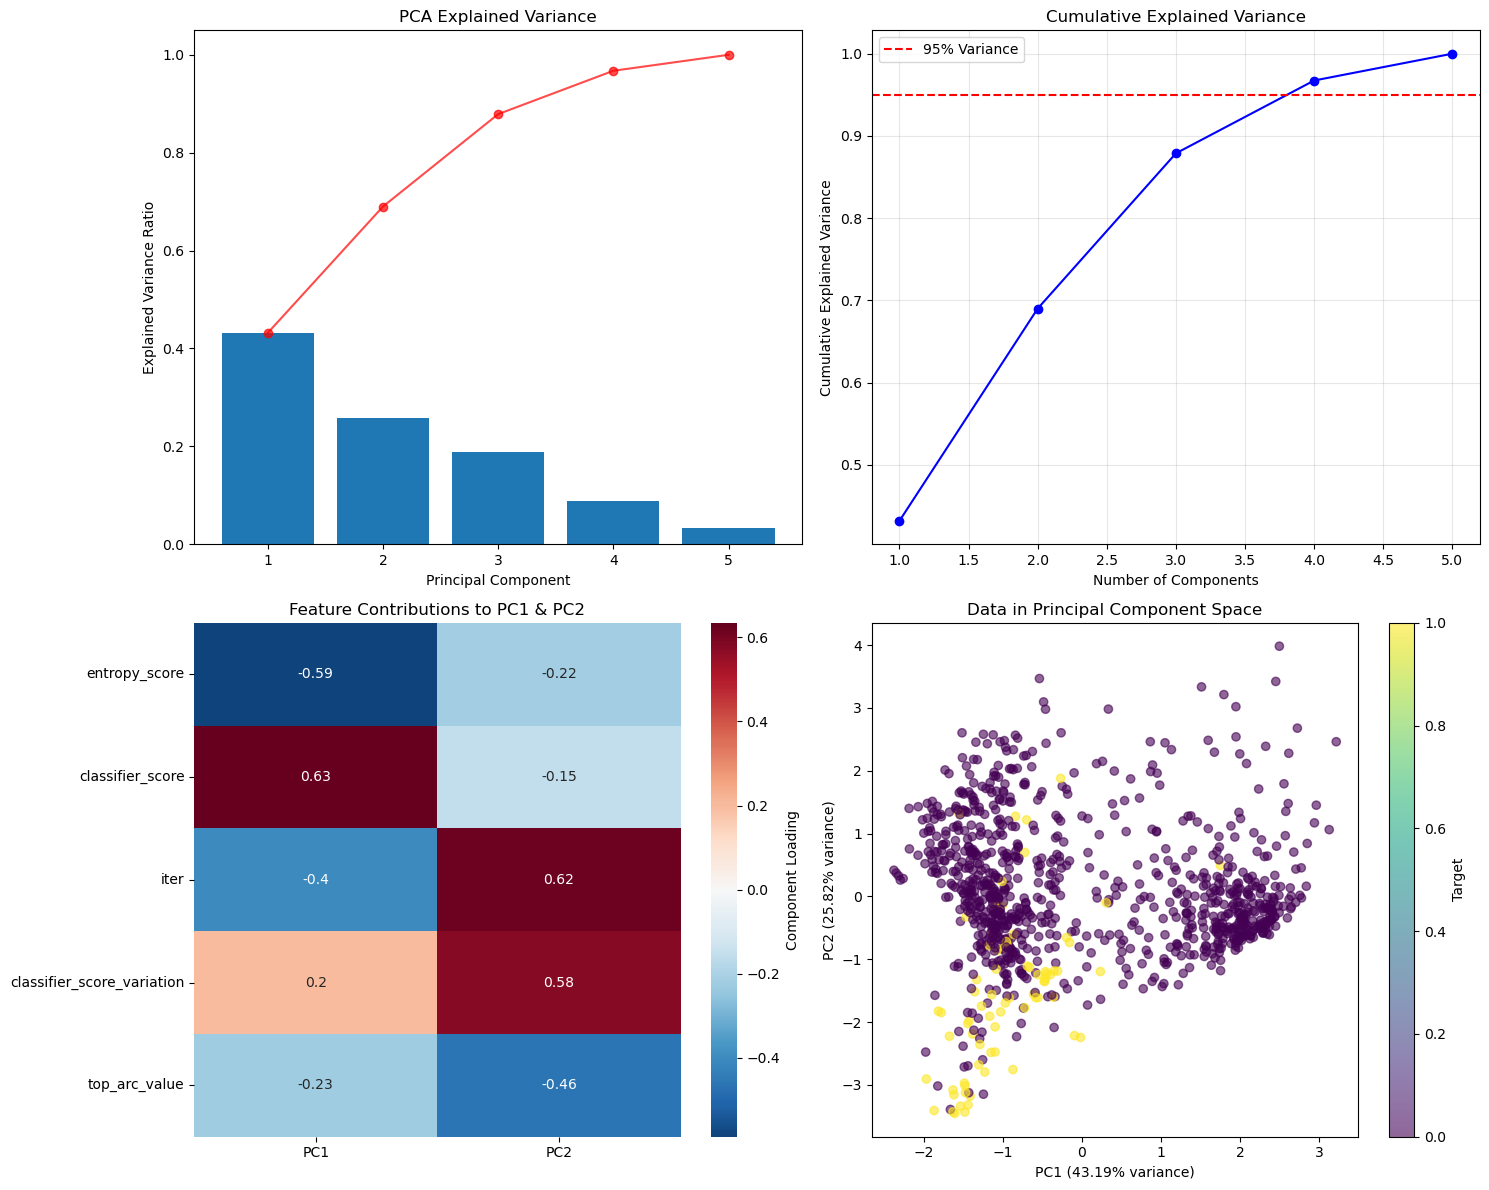


=== PCA Analysis Results ===
Total variance explained by first 2 components: 69.00%
Total variance explained by first 3 components: 87.88%

Most important features for PC1:
classifier_score              0.634420
entropy_score                 0.587161
iter                          0.403038
top_arc_value                 0.225781
classifier_score_variation    0.198337
dtype: float64

Most important features for PC2:
iter                          0.618694
classifier_score_variation    0.576294
top_arc_value                 0.461587
entropy_score                 0.219470
classifier_score              0.154511
dtype: float64


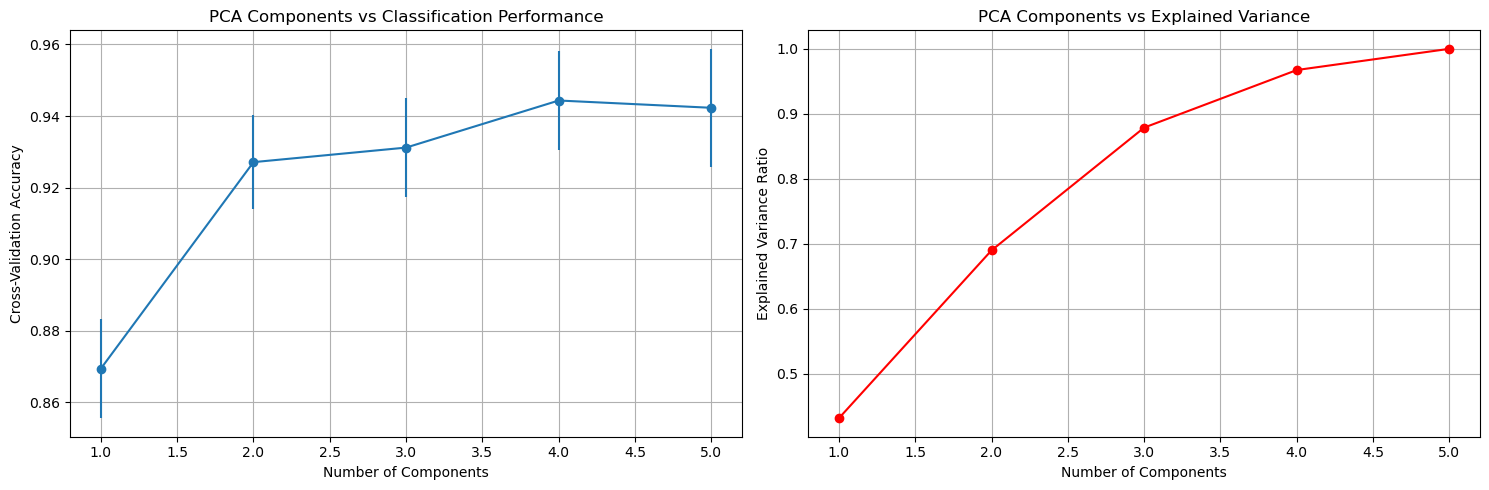

Optimal number of components: 4.0
Best accuracy: 0.944


In [8]:
run_pca_analysis(X, Y, feature_cols)


CLASSIFICATION ANALYSIS

Original Features:

Random Forest:
  Test Accuracy: 0.909
  CV Accuracy: 0.919 (+/- 0.013)
  ROC AUC: 0.819
  Confusion Matrix:
[[440  17]
 [ 28   9]]

Gradient Boosting:
  Test Accuracy: 0.903
  CV Accuracy: 0.923 (+/- 0.017)
  ROC AUC: 0.827
  Confusion Matrix:
[[438  19]
 [ 29   8]]

SVM:
  Test Accuracy: 0.802
  CV Accuracy: 0.792 (+/- 0.127)
  ROC AUC: 0.852
  Confusion Matrix:
[[368  89]
 [  9  28]]

Logistic Regression:
  Test Accuracy: 0.830
  CV Accuracy: 0.842 (+/- 0.078)
  ROC AUC: 0.731
  Confusion Matrix:
[[388  69]
 [ 15  22]]

Decision Tree:
  Test Accuracy: 0.824
  CV Accuracy: 0.820 (+/- 0.126)
  ROC AUC: 0.783
  Confusion Matrix:
[[384  73]
 [ 14  23]]

Best Classifier: Gradient Boosting

Feature Importance (Gradient Boosting):
  classifier_score_variation: 0.5052
  classifier_score: 0.4948


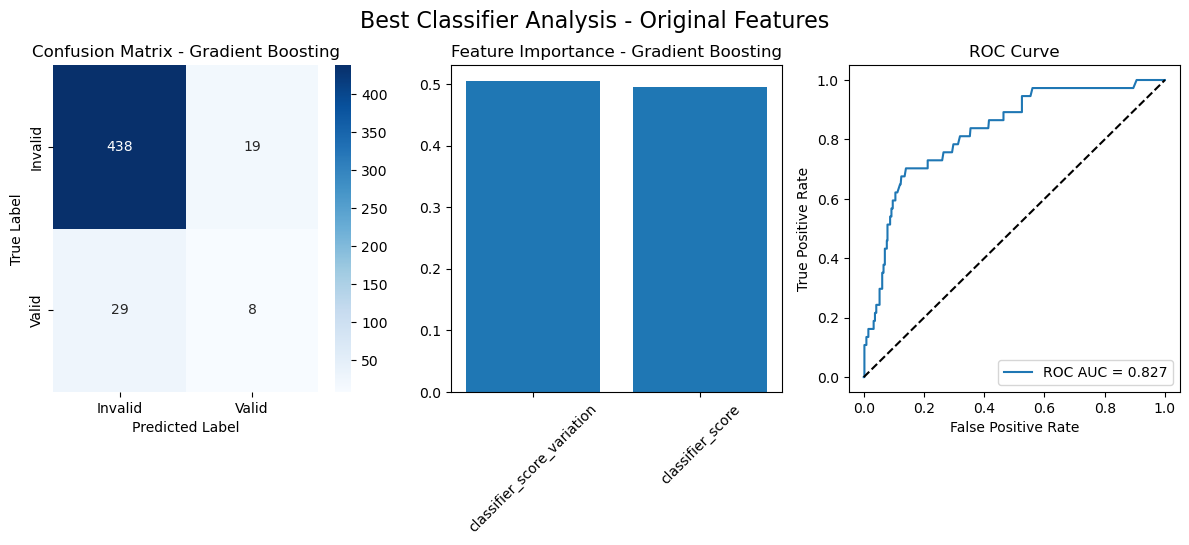

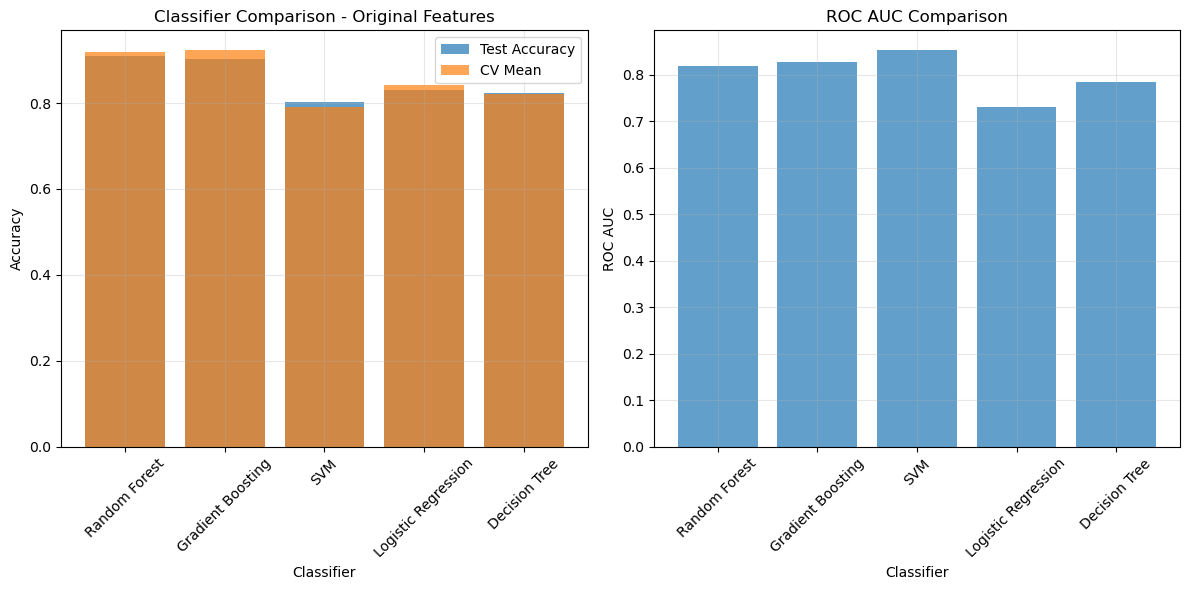


Classifier Comparison - Original Features:
         Classifier  Test Accuracy  CV Mean  CV Std  ROC AUC
      Random Forest          0.909    0.919   0.006    0.819
  Gradient Boosting          0.903    0.923   0.008    0.827
                SVM          0.802    0.792   0.064    0.852
Logistic Regression          0.830    0.842   0.039    0.731
      Decision Tree          0.824    0.820   0.063    0.783

PCA Features (2 components):

Random Forest:
  Test Accuracy: 0.913
  CV Accuracy: 0.919 (+/- 0.012)
  ROC AUC: 0.843
  Confusion Matrix:
[[444  13]
 [ 30   7]]

Gradient Boosting:
  Test Accuracy: 0.899
  CV Accuracy: 0.915 (+/- 0.033)
  ROC AUC: 0.831
  Confusion Matrix:
[[437  20]
 [ 30   7]]

SVM:
  Test Accuracy: 0.798
  CV Accuracy: 0.790 (+/- 0.121)
  ROC AUC: 0.855
  Confusion Matrix:
[[363  94]
 [  6  31]]

Logistic Regression:
  Test Accuracy: 0.836
  CV Accuracy: 0.850 (+/- 0.042)
  ROC AUC: 0.736
  Confusion Matrix:
[[391  66]
 [ 15  22]]

Decision Tree:
  Test Accuracy:

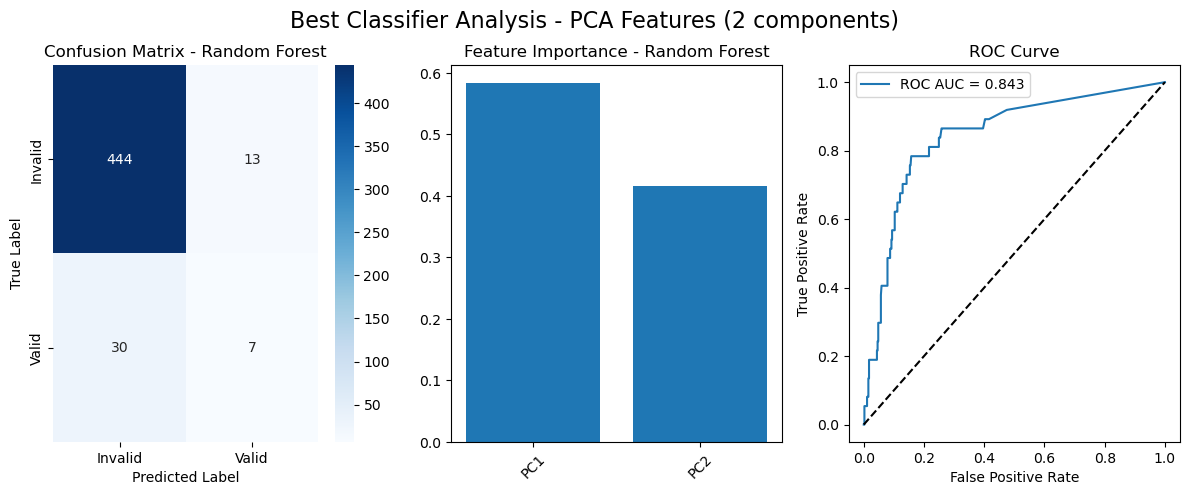

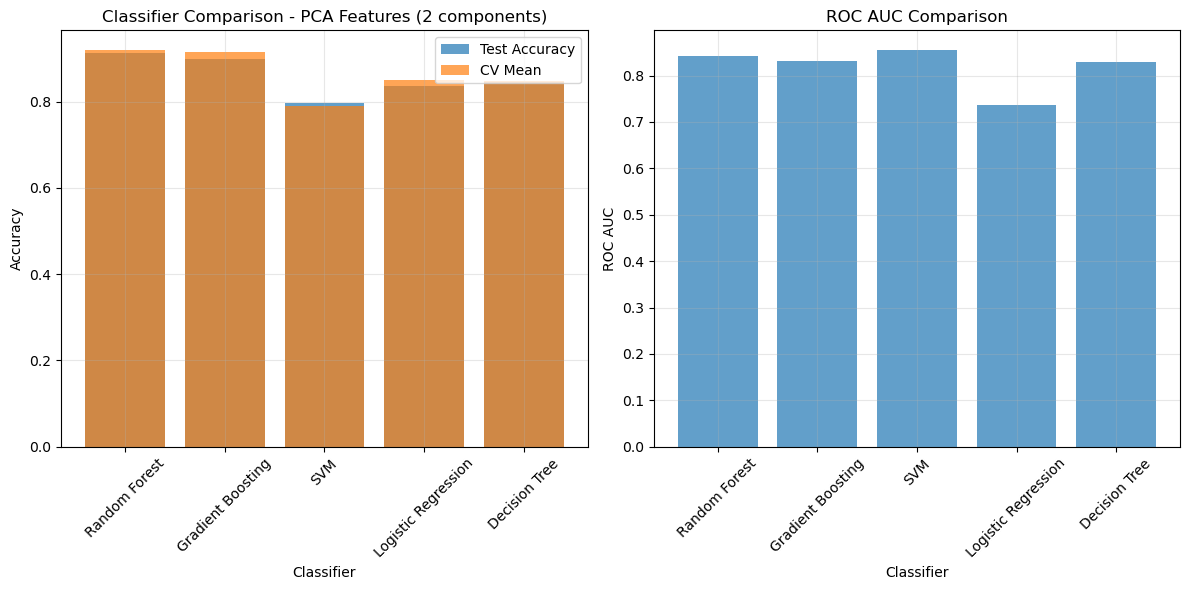


Classifier Comparison - PCA Features (2 components):
         Classifier  Test Accuracy  CV Mean  CV Std  ROC AUC
      Random Forest          0.913    0.919   0.006    0.843
  Gradient Boosting          0.899    0.915   0.016    0.831
                SVM          0.798    0.790   0.060    0.855
Logistic Regression          0.836    0.850   0.021    0.736
      Decision Tree          0.846    0.848   0.055    0.829


({'Random Forest': {'accuracy': 0.9089068825910931,
   'cv_mean': 0.9190270047412904,
   'cv_std': 0.006396948423145837,
   'confusion_matrix': array([[440,  17],
          [ 28,   9]], dtype=int64),
   'classifier': RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42),
   'roc_auc': 0.8194156957833106,
   'predictions': array([False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False,  True,
           True, False, False, False, False,  True, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False,  True, False, False, False, False,
          False, False, False, False,  True, False, False, False, Fals

In [5]:
run_classification_analysis(X, Y, feature_cols)

In [6]:
first_valid_dataset.print_summary()

FIRST VALID DATASET SUMMARY
Total VRP instances: 84
Instances with first valid: 75
Instances without valid: 9
Success rate: 89.3%

First Valid Iteration Statistics:
  Average iteration to first valid: 8.3
  Min iteration to first valid: 2.0
  Max iteration to first valid: 44.0
  Average time to first valid: 0.78s

Cost Statistics (first valid):
  Average solver cost: 1129.20
  Min solver cost: 636.08
  Max solver cost: 1573.13
